# Tabla de productos

# 1. Importacion de librerias, lectura de archivo y primeras visualizaciones

In [28]:
#Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#Lectura del archivo
Producto = pd.read_csv("2017PurchasePricesDec.csv",sep=',')

In [30]:
#Comprobamos la cantidad de registros 
np.shape (Producto)

(12261, 9)

In [31]:
#Visualizamos las primeras 5 filas
Producto.head ()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


In [32]:
#Corroboramos el tipo de dato de las columnas
print (Producto.dtypes)

Brand               int64
Description        object
Price             float64
Size               object
Volume             object
Classification      int64
PurchasePrice     float64
VendorNumber        int64
VendorName         object
dtype: object


In [33]:
#Verificamos la cantidad de datos faltantes por columna
print(Producto.isnull().sum())

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64


In [34]:
#Verificamos las filas con valores nulos
Producto_filas_nulas = Producto.isnull().any(axis=1)

#Mostramos las filas con valores nulos
Producto_filas_con_nulos = Producto [Producto_filas_nulas]

#Imprimimos las filas con valores nulos
if not Producto_filas_con_nulos.empty:
    print("Filas con valores nulos encontradas:")
    print(Producto_filas_con_nulos)
else:
    print("No se encontraron filas con valores nulos.")

Filas con valores nulos encontradas:
      Brand Description  Price Size Volume  Classification  PurchasePrice  \
7915   4202         NaN    0.0  NaN    NaN               1          11.19   

      VendorNumber                   VendorName  
7915           480  BACARDI USA INC              


# 2. Limpieza de las columnas

Trabajamos sobre la limpieza de las columnas Size y Volume que tienen 1 valor faltante

In [35]:
# Obtenemos los valores únicos de la columna 'Size'
unique_sizes = Producto['Size'].unique()

# Obtenemos los valores únicos de la columna 'Volume'
unique_volumes = Producto['Volume'].unique()

# Mostramos los valores únicos de 'Size'
print("Valores únicos de 'Size':")
print(unique_sizes)

# Mostramos los valores únicos de 'Volume'
print("Valores únicos de 'Volume':")
print(unique_volumes)

Valores únicos de 'Size':
['750mL' '1000mL' '1750mL' '50mL' '375mL' '100mL 4 Pk' '50mL 5 Pk' '100mL'
 '200mL' '50mL 4 Pk' '50mL 3 Pk' '300mL' '200mL 4 Pk' 'Unknown'
 '750mL 2 Pk' '250mL 4 Pk' '1500mL' '3000mL' '5000mL' '4000mL'
 '187mL 4 Pk' '150mL' '187mL' '500mL' '720mL' '650mL' '200mL 3 Pk'
 '187mL 3 Pk' '330mL' '250mL' '750mL + 3/' '18000mL' '180mL' '750mL + 4/'
 '6000mL' '1000mL 2 Pk' '750mL 12 P' '750mL 6 Pk' '20mL 5 Pk' nan
 '375mL 2 Pk' '20000mL' '50mL 12 Pk' '750mL 3 Pk' '375mL 3 Pk'
 '750mL + 1/' '200mL 5 Pk' '162.5mL' '400mL' '1100ml' '600mL' '19500mL'
 '560mL' '3750mL' '750mL  3' '1500ml' '9000mL']
Valores únicos de 'Volume':
['750' '1000' '1750' '50' '375' '100' '200' '300' 'Unknown' '250' '1500'
 '3000' '5000' '4000' '187' '150' '500' '720' '650' '330' '18000' '180'
 '6000' '20' nan '20000' '162.5' '400' '1100' '600' '19500' '560' '3750'
 '9000']


In [36]:
#Obtenemos un conteo de los unicos de la columna Size
valores_unicos = Producto['Size'].value_counts()
print(valores_unicos)

Size
750mL          9823
1500mL          486
1750mL          433
1000mL          427
375mL           318
50mL            276
3000mL          104
187mL            52
500mL            51
187mL 4 Pk       48
5000mL           44
200mL            26
300mL            24
4000mL           16
1500ml           11
720mL            11
100mL             8
750mL 2 Pk        6
250mL 4 Pk        6
50mL 4 Pk         6
330mL             5
180mL             5
50mL 3 Pk         5
20000mL           5
50mL 5 Pk         4
200mL 3 Pk        4
6000mL            4
Unknown           4
187mL 3 Pk        4
375mL 2 Pk        3
200mL 4 Pk        3
750mL 3 Pk        3
18000mL           3
250mL             3
150mL             2
100mL 4 Pk        2
375mL 3 Pk        2
750mL + 3/        2
750mL 6 Pk        2
600mL             2
560mL             2
20mL 5 Pk         1
750mL + 4/        1
1000mL 2 Pk       1
650mL             1
750mL 12 P        1
750mL + 1/        1
50mL 12 Pk        1
400mL             1
162.5mL        

In [37]:
# Filtramos filas de la columna 'Size' contiene la palabra "Pk"
pk_sizes = Producto[Producto['Size'].str.contains('Pk', na=False)]

# Obtenemos los unicos de cada valor de 'Size' que contiene "Pk"
unique_pk_sizes = pk_sizes.drop_duplicates(subset=['Size'])

# Imprimimos los únicos
print(unique_pk_sizes[['Size', 'Description', 'Classification']])

              Size                   Description  Classification
113     100mL 4 Pk  Glenmorangie Collection 4 Pk               1
115      50mL 5 Pk      Malibu 50ml Sampler Pack               1
330      50mL 4 Pk  Jack Daniels Family 4 Pk/50m               1
363      50mL 3 Pk              Crown Royal Trio               1
398     200mL 4 Pk   Johnnie Walker Collection 4               1
641     750mL 2 Pk  Bombay Sapphire & East 2 Pak               1
932     250mL 4 Pk    Goslings Dark'N Stormy RTD               1
1480    187mL 4 Pk     Sutter Home Clsc Wh Znfdl               2
3690    200mL 3 Pk  St George Gin 3/200mls Combo               1
3762    187mL 3 Pk        Cavit Prosecco Lunetta               2
6918   1000mL 2 Pk  Grey Goose 2Pak Cherry/Origi               1
7737    750mL 6 Pk    Viberti Mixed Wooden Box 6               2
7858     20mL 5 Pk  The Bitter Truth 5/20mls Pak               1
8754    375mL 2 Pk       Maker's Mark Combo Pack               1
8864    50mL 12 Pk    12 

In [38]:
# Filtramos las filas de la columna 'Size' que contiene 'Unknown' y obtenemos los valores de posición de la columna 'Brand'
brands_with_unknown_size = Producto[Producto['Size'] == 'Unknown']['Brand']

# Mostramos los resultados
print(brands_with_unknown_size)

542       2993
5921      9908
8795      8992
10009    90590
Name: Brand, dtype: int64


In [39]:
#Rellenamos Unknown de la columna Size

#Se actualiza el valor Brand 2993, y al resto se les agrega no aplica ya que se trata de vasos

# Considerando Brand 2993, reemplazamos Unknown de la columna Size por 200
Producto.loc[Producto['Brand'] == 2993, 'Size'] = '200'

# En Brand 9908, 8992 y 90590, reemplazamos Unknown de la columna Size por 'No aplica'
Producto.loc[Producto['Brand'].isin([9908, 8992, 90590]), 'Size'] = 'No Aplica'

# Imprimimos para verificar el cambio
updated_rows = Producto[Producto['Brand'].isin([2993, 9908, 8992, 90590])]
print(updated_rows)

       Brand                   Description  Price       Size   Volume  \
542     2993             Angostura Bitters   7.49        200  Unknown   
5921    9908      Tito's Copper Mug 2 Pack  21.01  No Aplica  Unknown   
8795    8992                      Group 92   1.99  No Aplica  Unknown   
10009  90590  Overture Champagne 2Glass Pk  19.95  No Aplica  Unknown   

       Classification  PurchasePrice  VendorNumber  \
542                 1           5.39          5895   
5921                1          16.15          4425   
8795                1           1.43          1703   
10009               2          13.12          4425   

                                VendorName  
542            Mizkan Americas, Inc.        
5921                 MARTIGNETTI COMPANIES  
8795   ALISA CARR BEVERAGES                 
10009                MARTIGNETTI COMPANIES  


In [40]:
# Filtramos filas de la columna 'Size' contiene "/"
barra_sizes = Producto[Producto['Size'].str.contains('/', na=False)]

# Obtenemos los unicos de cada valor de 'Size' que contiene "Pk"
unique_barra_sizes = barra_sizes.drop_duplicates(subset=['Size'])

# Imprimimos los únicos
print(unique_barra_sizes[['Size', 'Description']])

             Size                 Description
3974   750mL + 3/   Glenmorangie Original VAP
5432   750mL + 4/     Red Stag VAP 750+4/50ml
10191  750mL + 1/  Crown Royal Shot Glass VAP


In [41]:
#Como vemos que la columna Size contiene informacion sobre size y sobre packs, entonces vamos a hacer una separacion en 2 columnas

#Funcion para separar la columna 'Size'
def separar_size(size):
    if pd.isna(size) or 'Unknown' in size or 'No Aplica' in size:
        return pd.Series(['No Aplica', 'No Aplica'])
    
    size_parts = size.split(' ')
    size_ml = size_parts[0].strip()
    pack = ''
    
    if len(size_parts) > 1:
        for pack_part in size_parts[1:]:
            pack += pack_part
    else:
        pack = 'No Aplica'
    
    return pd.Series([size_ml, pack])

#Aplicamos la función a la columna 'Size'
Producto[['Size', 'Pack']] = Producto['Size'].apply(separar_size)

# Mostrar las primeras filas del DataFrame para verificar el cambio
print(Producto[['Size', 'Pack']].head(400))

      Size       Pack
0    750mL  No Aplica
1    750mL  No Aplica
2    750mL  No Aplica
3    750mL  No Aplica
4    750mL  No Aplica
..     ...        ...
395  750mL  No Aplica
396  750mL  No Aplica
397  750mL  No Aplica
398  200mL        4Pk
399  750mL  No Aplica

[400 rows x 2 columns]


In [42]:
#Volvemos a obtener un conteo de los unicos de la columna Size par asegurarnos de los cambios
valores_unicos = Producto['Size'].value_counts()
print(valores_unicos)

Size
750mL        9840
1500mL        486
1750mL        433
1000mL        428
375mL         323
50mL          292
3000mL        104
187mL         104
500mL          51
5000mL         44
200mL          34
300mL          24
4000mL         16
720mL          11
1500ml         11
100mL          10
250mL           9
330mL           5
20000mL         5
180mL           5
6000mL          4
No Aplica       4
18000mL         3
560mL           2
600mL           2
150mL           2
200             1
650mL           1
20mL            1
162.5mL         1
400mL           1
19500mL         1
1100ml          1
3750mL          1
9000mL          1
Name: count, dtype: int64


In [43]:
# Filtrar registros donde 'Pack' es diferente de 'No Aplica'
filtered_df = Producto[Producto['Pack'] != 'No Aplica']

# Mostrar los registros filtrados
filtered_df.head(50)

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName,Pack
113,1133,Glenmorangie Collection 4 Pk,31.99,100mL,100,1,23.01,8112,MOET HENNESSY USA INC,4Pk
115,1136,Malibu 50ml Sampler Pack,4.99,50mL,50,1,3.87,17035,PERNOD RICARD USA,5Pk
160,1365,Stoli Mini Bar 5/50mLs Pack,7.99,50mL,50,1,6.05,8664,"STOLI GROUP,(USA) LLC",5Pk
330,2250,Jack Daniels Family 4 Pk/50m,12.99,50mL,50,1,9.69,1128,BROWN-FORMAN CORP,4Pk
363,2453,Crown Royal Trio,5.99,50mL,50,1,4.31,3960,DIAGEO NORTH AMERICA INC,3Pk
398,2604,Johnnie Walker Collection 4,99.99,200mL,200,1,73.52,3960,DIAGEO NORTH AMERICA INC,4Pk
641,3341,Bombay Sapphire & East 2 Pak,34.99,750mL,750,1,25.17,480,BACARDI USA INC,2Pk
932,4062,Goslings Dark'N Stormy RTD,7.99,250mL,250,1,5.83,1485,CASTLE BRANDS CORP.,4Pk
940,4105,Patron XO Cafe Variety 3 Pak,6.99,50mL,50,1,5.07,9165,ULTRA BEVERAGE COMPANY LLP,3Pk
1127,4881,Bacardi Twin Pack 2/750mls,19.99,750mL,750,1,14.81,480,BACARDI USA INC,2Pk


In [44]:
#Filtramos las filas con 'Unknown' en la columna 'Volume'
unknown_rows = Producto[Producto['Volume'] == 'Unknown']

#Filtramos las filas con NaN en la columna 'Volume'
nan_rows = Producto[Producto['Volume'].isna()]

#Imprimimos las filas con 'Unknown' en la columna 'Volume'
print("Filas con 'Unknown' en la columna 'Volume':")
print(unknown_rows)

# Imprimimos las filas con NaN en la columna 'Volume'
print("\nFilas con NaN en la columna 'Volume':")
print(nan_rows)

Filas con 'Unknown' en la columna 'Volume':
       Brand                   Description  Price       Size   Volume  \
542     2993             Angostura Bitters   7.49        200  Unknown   
5921    9908      Tito's Copper Mug 2 Pack  21.01  No Aplica  Unknown   
8795    8992                      Group 92   1.99  No Aplica  Unknown   
10009  90590  Overture Champagne 2Glass Pk  19.95  No Aplica  Unknown   

       Classification  PurchasePrice  VendorNumber  \
542                 1           5.39          5895   
5921                1          16.15          4425   
8795                1           1.43          1703   
10009               2          13.12          4425   

                                VendorName       Pack  
542            Mizkan Americas, Inc.        No Aplica  
5921                 MARTIGNETTI COMPANIES  No Aplica  
8795   ALISA CARR BEVERAGES                 No Aplica  
10009                MARTIGNETTI COMPANIES  No Aplica  

Filas con NaN en la columna 'Volume':


In [45]:
#Verificamos la cantidad de datos faltantes por columna para ver nuestros cambios
print(Producto.isnull().sum())

Brand             0
Description       1
Price             0
Size              0
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
Pack              0
dtype: int64


In [46]:
# Verificamos si hay filas duplicadas
filas_duplicadas = Producto.duplicated()

# Contamos el número de filas duplicadas
contar_filas_duplicadas = filas_duplicadas.sum()

# Mostramos el número de filas duplicadas
print(f'Número de filas duplicadas en la tabla Producto: {contar_filas_duplicadas}')

#Imprimimos
if contar_filas_duplicadas > 0:
    print("Filas duplicadas en la tabla Producto:")
    print(Producto[filas_duplicadas])

Número de filas duplicadas en la tabla Producto: 0


Trabajamos sobre la limpieza de la columna Description que tiene 1 valor faltante

In [47]:
#Filtramos la fila donde la columna 'Description' es nula
null_description_row = Producto[Producto['Description'].isnull()]

#Imprimimos la fila con 'Description' nulo
print(null_description_row)


      Brand Description  Price       Size Volume  Classification  \
7915   4202         NaN    0.0  No Aplica    NaN               1   

      PurchasePrice  VendorNumber                   VendorName       Pack  
7915          11.19           480  BACARDI USA INC              No Aplica  


In [48]:
#Realizamos un analisis mas profundo, donde filtramos la fila donde 'VendorNumber' es igual a 480 y 'PurchasePrice' es igual a 11.19
filtered_rows = Producto[(Producto['VendorNumber'] == 480) & (Producto['PurchasePrice'] == 11.19)]

#Imprimimos
print(filtered_rows)

#Vemos que se trata del mismo articulo

       Brand             Description  Price       Size Volume  Classification  \
7915    4202                     NaN   0.00  No Aplica    NaN               1   
10418   4092  Bacardi Grapefruit Rum  13.99      750mL    750               1   

       PurchasePrice  VendorNumber                   VendorName       Pack  
7915           11.19           480  BACARDI USA INC              No Aplica  
10418          11.19           480  BACARDI USA INC              No Aplica  


In [49]:
#Decidimos eliminar la fila donde la columna 'Description' tiene valores nulos, donde Brand es 4202
Producto.dropna(subset=['Description'], inplace=True)

#Imprimimos para verificar el cambio.
print(Producto.isnull().sum())

Brand             0
Description       0
Price             0
Size              0
Volume            0
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
Pack              0
dtype: int64


In [50]:
#Comprobamos la cantidad de registros 
np.shape (Producto)

(12260, 10)

En este punto, ya no tenemos valores nulos en nuestra tabla de Productos.
Vamos a renombrar el nombre de las columnas de nuestro dataframe

In [51]:
# Creamos un diccionario con los nombres actuales de las columnas a los nuevos nombres
column_renames = {
    'Brand': 'MarcaID',
    'Description': 'Descripcion',
    'Price': 'Precio_venta',
    'Size': 'Tamaño',
    'Volume': 'Volumen',
    'Classification': 'Clasificacion',
    'PurchasePrice': 'Precio_compra',
    'VendorNumber': 'ProveedorID',
    'VendorName': 'Nombre_proveedor',
    'Pack': 'Pack'
}

# Renombramos las columnas
Producto.rename(columns=column_renames, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(Producto.head())

   MarcaID                  Descripcion  Precio_venta Tamaño Volumen  \
0       58  Gekkeikan Black & Gold Sake         12.99  750mL     750   
1       62     Herradura Silver Tequila         36.99  750mL     750   
2       63   Herradura Reposado Tequila         38.99  750mL     750   
3       72         No. 3 London Dry Gin         34.99  750mL     750   
4       75    Three Olives Tomato Vodka         14.99  750mL     750   

   Clasificacion  Precio_compra  ProveedorID             Nombre_proveedor  \
0              1           9.28         8320  SHAW ROSS INT L IMP LTD       
1              1          28.67         1128  BROWN-FORMAN CORP             
2              1          30.46         1128  BROWN-FORMAN CORP             
3              1          26.11         9165  ULTRA BEVERAGE COMPANY LLP    
4              1          10.94         7245  PROXIMO SPIRITS INC.          

        Pack  
0  No Aplica  
1  No Aplica  
2  No Aplica  
3  No Aplica  
4  No Aplica  


Verificamos la existencia de valores negativos en nuestras columnas

In [52]:
# Verificamos si hay valores negativos en las columnas numéricas
negativos = Producto.select_dtypes(include=['number']) < 0

#Imprimimos los nombres de las columnas que tienen valores negativos
negativos_columna = negativos.any()

# Filtrar las columnas que tienen al menos un valor negativo
columnas_con_negativos = negativos_columna[negativos_columna].index.tolist()

# Mostrar los resultados
if columnas_con_negativos:
    print(f"Columnas con valores negativos: {columnas_con_negativos}")
    for column in columnas_con_negativos:
        print(f"\nValores negativos en la columna '{column}':")
        print(Producto[Producto[column] < 0])
else:
    print("No hay valores negativos en el nuestro Dataframe.")

No hay valores negativos en el nuestro Dataframe.


# 3. EDA (Análisis Exploratorio de Datos) es una etapa crucial en el análisis de datos.
En este punto, trataremos de explorar y entender los datos, es el proceso de examinar y resumir las principales características de un conjunto de datos.. El EDA implica varias técnicas y herramientas que te ayudan a obtener una visión clara de la estructura y las características de tus datos.
El objetivo es identificar patrones y detectar valores atípicos.


Realizamos un analisis descriptivo de cada columna

In [53]:
#Aplicamos un ciclo For para iterar sobre cada columna de nuestro dataframe
for i in Producto.columns:
    print(i)
    print(Producto[i].describe()) 
    print('------------------------')

MarcaID
count    12260.000000
mean     17990.191680
std      12528.395592
min         58.000000
25%       5991.500000
50%      18789.000000
75%      25117.250000
max      90631.000000
Name: MarcaID, dtype: float64
------------------------
Descripcion
count                    12260
unique                   11114
top       Bacardi Superior Rum
freq                         7
Name: Descripcion, dtype: object
------------------------
Precio_venta
count    12260.000000
mean        38.643392
std        206.159284
min          0.000000
25%         10.990000
50%         15.990000
75%         29.990000
max      13999.900000
Name: Precio_venta, dtype: float64
------------------------
Tamaño
count     12260
unique       35
top       750mL
freq       9840
Name: Tamaño, dtype: object
------------------------
Volumen
count     12260
unique       33
top         750
freq       9840
Name: Volumen, dtype: object
------------------------
Clasificacion
count    12260.000000
mean         1.709054
std       

In [55]:
#Para profundizar el analisis, trabajamos con las columnas que tienen tipo de datos flotantes
#Definimos la variable que contiene columnas de tipo flotante
columnas_flotantes = ['MarcaID', 'Precio_venta','Clasificacion', 'Precio_compra', 'ProveedorID']

#Definimos la función para imprimir las estadísticas de una columna
def print_column_stats(df, column):
    print(f"\nEstadísticas para la columna '{column}':")
    print(f"Número total de valores (incluyendo nulos): {len(df[column])}")
    column_stats = df[column].describe()
    print(f"Número total de valores: {column_stats['count']}")
    print(f"Número de valores únicos: {df[column].nunique()}")
    print(f"Valor más frecuente (top): {df[column].mode()[0]}")
    print(f"Frecuencia del valor más frecuente (freq): {df[column].value_counts().iloc[0]}")
    print(f"Valor mínimo: {column_stats['min']}")
    print(f"Valor máximo: {column_stats['max']}")
    print(f"Media: {column_stats['mean']}")


#Con un ciclo For, iteraramos sobre las columnas de flotantes
for column in columnas_flotantes:
    print_column_stats(Producto, column)


Estadísticas para la columna 'MarcaID':
Número total de valores (incluyendo nulos): 12260
Número total de valores: 12260.0
Número de valores únicos: 12260
Valor más frecuente (top): 58
Frecuencia del valor más frecuente (freq): 1
Valor mínimo: 58.0
Valor máximo: 90631.0
Media: 17990.19168026101

Estadísticas para la columna 'Precio_venta':
Número total de valores (incluyendo nulos): 12260
Número total de valores: 12260.0
Número de valores únicos: 380
Valor más frecuente (top): 9.99
Frecuencia del valor más frecuente (freq): 703
Valor mínimo: 0.0
Valor máximo: 13999.9
Media: 38.643391517128876

Estadísticas para la columna 'Clasificacion':
Número total de valores (incluyendo nulos): 12260
Número total de valores: 12260.0
Número de valores únicos: 2
Valor más frecuente (top): 2
Frecuencia del valor más frecuente (freq): 8693
Valor mínimo: 1.0
Valor máximo: 2.0
Media: 1.7090538336052201

Estadísticas para la columna 'Precio_compra':
Número total de valores (incluyendo nulos): 12260
Númer

Trabajamos sobre los ceros de las columnas Precio_venta y Precio_compra. 
Volvemos a aplicar ETL sobre nuestros datos, ya que observamos algunos 0.

In [56]:
#Contamos cuantas celdas hay con precio=0 en la columna 'Precio_compra'
zero_price_count = (Producto['Precio_compra'] == 0).sum()

#Imprimimos
print(f"Número de celdas con precio=0 en la columna Precio_compra es : {zero_price_count}")

Número de celdas con precio=0 en la columna Precio_compra es : 1


In [57]:
#Filtramos la filas donde 'Precio_compra' es igual a 0
zero_price_rows = Producto[Producto['Precio_compra'] == 0]

#Imprimimos
print(zero_price_rows)

       MarcaID                  Descripcion  Precio_venta Tamaño Volumen  \
10803     2166  The Macallan Double Cask 12           0.0  750mL     750   

       Clasificacion  Precio_compra  ProveedorID             Nombre_proveedor  \
10803              1            0.0         2561  EDRINGTON AMERICAS            

            Pack  
10803  No Aplica  


In [58]:
#Filtramos la filas donde 'Precio_venta' es igual a 0
zero_price_rows = Producto[Producto['Precio_venta'] == 0]

#Imprimimos
print(zero_price_rows)

#Es el mismo articulo que tiene valor 0 en Precio_venta y Precio_compra


       MarcaID                  Descripcion  Precio_venta Tamaño Volumen  \
10803     2166  The Macallan Double Cask 12           0.0  750mL     750   

       Clasificacion  Precio_compra  ProveedorID             Nombre_proveedor  \
10803              1            0.0         2561  EDRINGTON AMERICAS            

            Pack  
10803  No Aplica  


In [59]:
#Vamos a encontrar el valor medio de cada columna para reemplazarlo en el valor 0 de "The Macallan Double Cask 12"

#Verificamos las filas que contienen "The Macallan Double Cask 12" en la columna Descripcion
macallan_rows = Producto[Producto['Descripcion'].str.contains("The Macallan Double Cask 12", na=False)]
print("\nFilas antes de la actualización:")
print(macallan_rows)

#Calculamos el valor medio de la columna Precio_compra y Precio_venta
mean_purchase_price = round(Producto['Precio_compra'].mean(), 2)
mean_price = round(Producto['Precio_venta'].mean(), 2)

print(f"\nValor medio de Precio_compra: {mean_purchase_price}")
print(f"Valor medio de Precio_venta: {mean_price}")

#Reemplazamos los valores en Precio_compra y Precio_venta para "The Macallan Double Cask 12" con los valores medios
Producto.loc[
    Producto['Descripcion'].str.contains("The Macallan Double Cask 12", na=False), 
    ['Precio_compra', 'Precio_venta']
] = [mean_purchase_price, mean_price]

# Verificamos las filas que contienen "The Macallan Double Cask 12" después del reemplazo
macallan_rows_updated = Producto[Producto['Descripcion'].str.contains("The Macallan Double Cask 12", na=False)]
print("\nFilas después de la actualización:")
print(macallan_rows_updated)



Filas antes de la actualización:
       MarcaID                  Descripcion  Precio_venta Tamaño Volumen  \
10803     2166  The Macallan Double Cask 12           0.0  750mL     750   

       Clasificacion  Precio_compra  ProveedorID             Nombre_proveedor  \
10803              1            0.0         2561  EDRINGTON AMERICAS            

            Pack  
10803  No Aplica  

Valor medio de Precio_compra: 26.49
Valor medio de Precio_venta: 38.64

Filas después de la actualización:
       MarcaID                  Descripcion  Precio_venta Tamaño Volumen  \
10803     2166  The Macallan Double Cask 12         38.64  750mL     750   

       Clasificacion  Precio_compra  ProveedorID             Nombre_proveedor  \
10803              1          26.49         2561  EDRINGTON AMERICAS            

            Pack  
10803  No Aplica  


Nos interesa entender a que se refiere la clasificacion de bebidas de 1 y 2, por lo cual generamos medidas descriptivas y una pequeña muestra representativa de cada clasificacion

In [60]:
#Obtenemos las estadísticas descriptivas agrupadas por clasificación 1 y 2
grouped_by_class = Producto.groupby('Clasificacion').describe(include='all')

#Mostramos las estadísticas descriptivas agrupadas por clasificación 1 y 2
print("Estadísticas Descriptivas Agrupadas por Clasificación:")
print(grouped_by_class)

# Obtener una pequeña muestra representativos de cada clasificación
examples_class_1 = Producto[Producto['Clasificacion'] == 1].head(10)
examples_class_2 = Producto[Producto['Clasificacion'] == 2].head(10)

print("\nMuestra de bebidas Clasificación 1:")
print(examples_class_1)

print("\nMuestra de bebidas de Clasificación 2:")
print(examples_class_2)

Estadísticas Descriptivas Agrupadas por Clasificación:
              MarcaID                                                   \
                count unique top freq          mean          std   min   
Clasificacion                                                            
1              3567.0    NaN NaN  NaN   3641.196243  2352.774355  58.0   
2              8693.0    NaN NaN  NaN  23878.017140  9996.909932  82.0   

                                          ...   Pack                        \
                   25%      50%      75%  ... unique        top  freq mean   
Clasificacion                             ...                                
1               1983.0   3345.0   5057.0  ...     11  No Aplica  3523  NaN   
2              17623.0  22765.0  26867.0  ...      5  No Aplica  8629  NaN   

                                             
               std  min  25%  50%  75%  max  
Clasificacion                                
1              NaN  NaN  NaN  NaN  NaN  NaN  

# 4.Visualizaciones para identificar relaciones y patrones. Trabajamos con Matplotlib y Seaborn

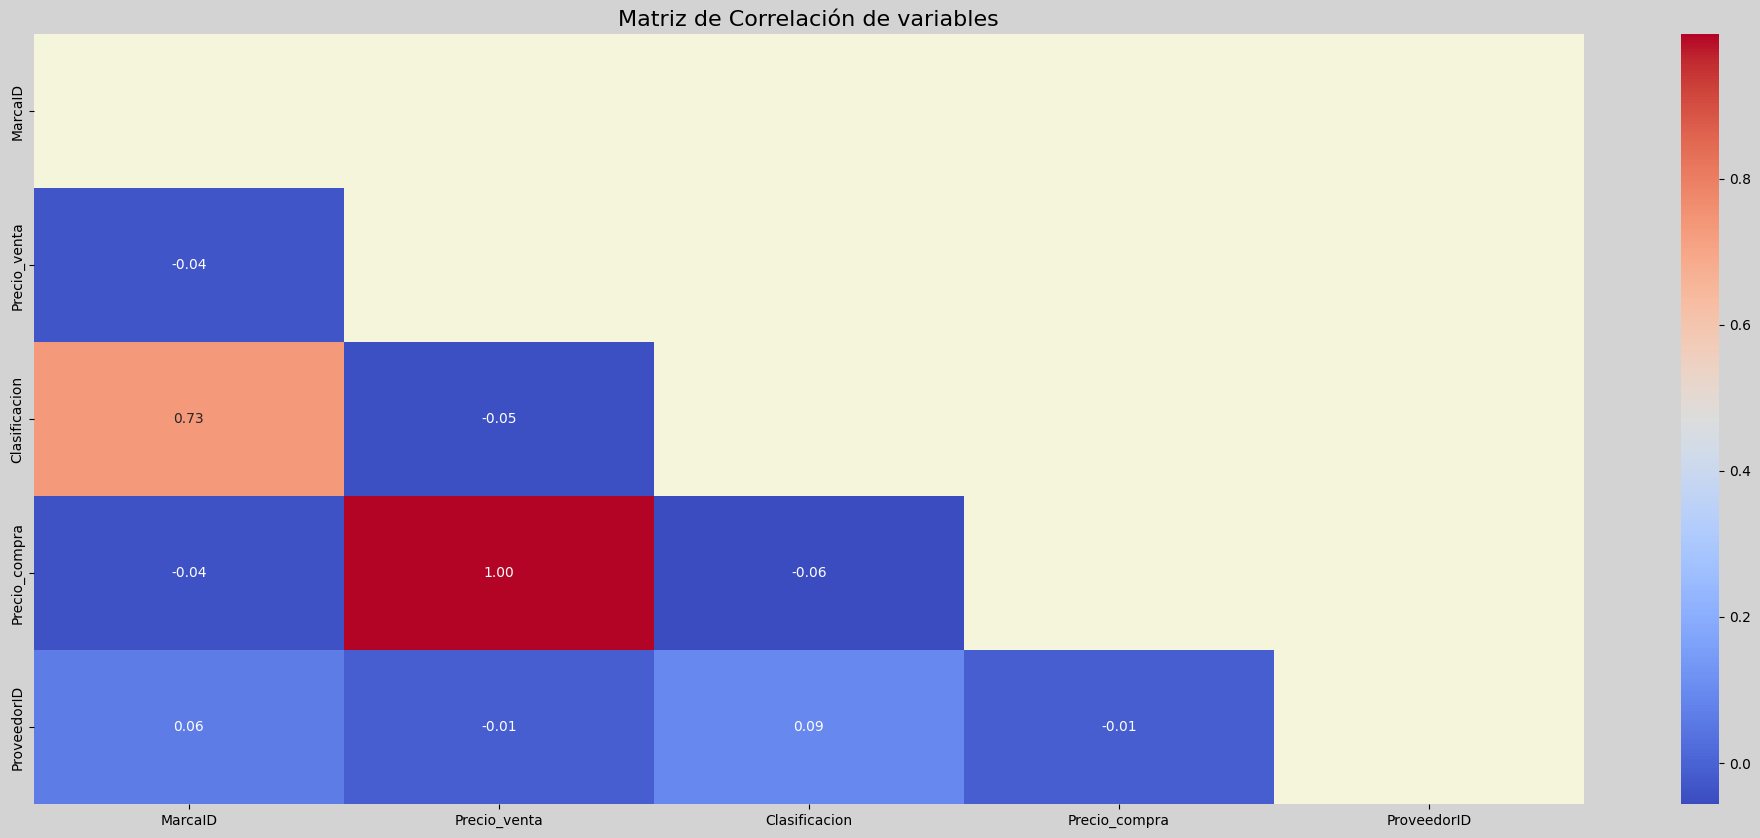

In [61]:
#Realizamos un primer acercamiento con una matriz de correlación para ver si existe alguna relación entre las variables para tener en cuenta en un análisis posterior

#Creamos la matriz de correlación de las variables

columnas_numericas= Producto.select_dtypes(include=['float64','int64']).columns
matriz_correlacion= Producto[columnas_numericas].corr()

#Creamos la mascara_correlacion para el triangulo superior
mascara_correlacion=np.triu(np.ones_like(matriz_correlacion,dtype=bool))

#Creamos la grafica para ver la matriz de correlacion
plt.figure(figsize=(25,10))
heatmap= sns.heatmap(matriz_correlacion, mask=mascara_correlacion, annot=True, cmap='coolwarm', fmt='.2f')  #usamos la libreria seaborn, fmt es el numero de float que me muestra 2 decimales
plt.gca().set_facecolor('beige')                # Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')            # Establecemos el fondo alrededor del gráfico 

#Añadimos un titulo 
plt.title('Matriz de Correlación de variables', fontsize=16)

#Mostramos el gráfico
plt.show()   

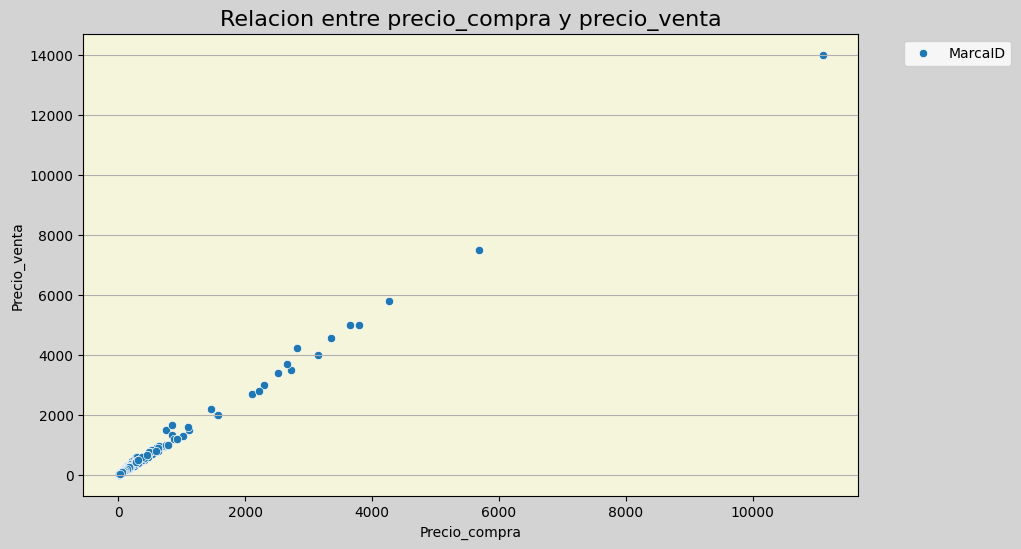

In [62]:
# Relación entre precio_venta y precio_compra

#Creamos la figura y los ejes
fig,ax= plt.subplots(figsize=(10,6))

#Creamos el gráfico de dispersión
sns.scatterplot(x='Precio_compra', y='Precio_venta', data=Producto)
plt.gca().set_facecolor('beige')                    #Definimos el color de fondo del área del gráfico
plt.gcf().set_facecolor('lightgray')                #Establecemos el fondo alrededor del gráfico 

#Definimos el titulo del gráfico y de los ejes
plt.title('Relacion entre precio_compra y precio_venta',fontsize=16)
plt.xlabel('Precio_compra')              #Titulo eje x
plt.ylabel('Precio_venta')                 #Titulo eje y
plt.grid(axis='y')                              #Agregamos lineas cuadrículas solo en el eje y
plt.legend(Producto, bbox_to_anchor=(1.05, 1), loc='upper left')            #Añadimos las etiquetas de los nombres de los paises_seleccionados por fuera de nuestro gráfico

#Mostramos el gráfico
plt.show()  

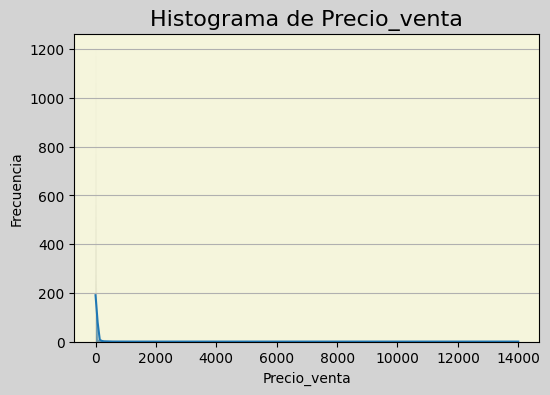

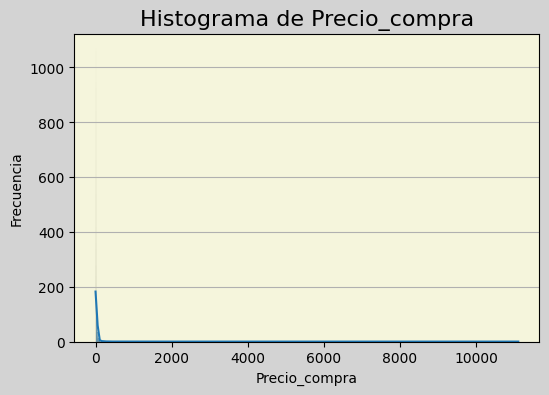

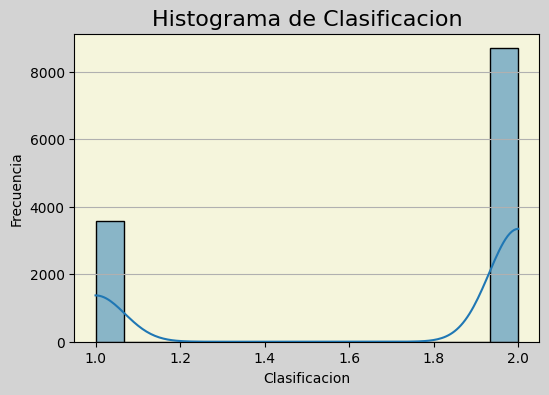

In [63]:
#Graficamos un diagrama de dispersión, para ver relaciones entre variables.

# Definimos una lista de columnas para las cuales queremos generar histogramas
columnas_histograma = ['Precio_venta', 'Precio_compra', 'Clasificacion']

# Con un ciclo for, iteramos sobre cada columna en la lista 'columnas_histograma'
for i in Producto[columnas_histograma]:
    
    # Creamos una nueva figura y un conjunto de subtramas con un tamaño específico
    fig, ax = plt.subplots(figsize = (6, 4))
    
    # Creamos un histograma para la columna actual con una curva de densidad de kernel (kde), definimos el color de fondo del gráfico
    sns.histplot(data=Producto, x=i, kde=True)
    plt.gca().set_facecolor('beige')                #Definimos el color de fondo del área del gráfico
    plt.gcf().set_facecolor('lightgray')            #Establecemos el fondo alrededor del gráfico 

    # Establecemos el título del gráfico como 'Histograma de ' seguido del nombre de la columna actual
    plt.title(f'Histograma de {i}',fontsize=16)
    plt.ylabel('Frecuencia')                        #Renombramos el eje y
    plt.grid(axis='y')                              # Agregar lineas solo en el eje y
    # Mostramos el gráfico
    plt.show()

In [64]:
#Guardamos estos procesos en un nuevo CSV
Producto.to_csv('Tabla_Producto.csv', index=False)

#Imprimimos mensaje de confirmacion
print("Archivo guardado exitosamente") 

Archivo guardado exitosamente
